# Imports & Load Data

In [ ]:
#Imports
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
# import sklearn as skl
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split

/opt/conda/lib/python3.10/site-packages/scipy/__init__.py:146: UserWarning: A NumPy version >=1.16.5 and <1.23.0 is required for this version of SciPy (detected version 1.24.3
  warnings.warn(f"A NumPy version >={np_minversion} and <{np_maxversion}"


In [ ]:
from sklearn.linear_model import LinearRegression
from sklearn.linear_model import Ridge
from sklearn.linear_model import Lasso
from sklearn.linear_model import ElasticNet
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor

In [ ]:
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
from sklearn.metrics import ConfusionMatrixDisplay

In [ ]:
import warnings
warnings.filterwarnings('ignore')

In [ ]:
%load_ext autoreload
%autoreload 2
%matplotlib inline

In [ ]:
sns.set()
sns.set_palette('rainbow')
SNS_CMAP = 'rainbow'

In [ ]:
from matplotlib.colors import LinearSegmentedColormap
cmap1 = LinearSegmentedColormap.from_list('', ['#2040cc', '#ffffff', '#50aa60'])

In [ ]:
df = pd.read_csv('/kaggle/input/playground-series-s3e26/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s3e26/test.csv')
df_sample = pd.read_csv('/kaggle/input/playground-series-s3e26/sample_submission.csv')
df = pd.read_csv('/kaggle/input/playground-series-s3e26/train.csv')
df_test = pd.read_csv('/kaggle/input/playground-series-s3e26/test.csv')
df_sample = pd.read_csv('/kaggle/input/playground-series-s3e26/sample_submission.csv')

In [ ]:
df_sample.head()

id  Status_C  Status_CL  Status_D
0  7905  0.628084   0.034788  0.337128
1  7906  0.628084   0.034788  0.337128
2  7907  0.628084   0.034788  0.337128
3  7908  0.628084   0.034788  0.337128
4  7909  0.628084   0.034788  0.337128

In [ ]:
df.head()

id  N_Days             Drug    Age Sex Ascites Hepatomegaly Spiders Edema  \
0   0     999  D-penicillamine  21532   M       N            N       N     N   
1   1    2574          Placebo  19237   F       N            N       N     N   
2   2    3428          Placebo  13727   F       N            Y       Y     Y   
3   3    2576          Placebo  18460   F       N            N       N     N   
4   4     788          Placebo  16658   F       N            Y       N     N   

   Bilirubin  Cholesterol  Albumin  Copper  Alk_Phos    SGOT  Tryglicerides  \
0        2.3        316.0     3.35   172.0    1601.0  179.80           63.0   
1        0.9        364.0     3.54    63.0    1440.0  134.85           88.0   
2        3.3        299.0     3.55   131.0    1029.0  119.35           50.0   
3        0.6        256.0     3.50    58.0    1653.0   71.30           96.0   
4        1.1        346.0     3.65    63.0    1181.0  125.55           96.0   

   Platelets  Prothrombin  Stage Status  
0      394.0          9.7    3.0      D  
1      361.0         11.0    3.0      C  
2      199.0         11.7    4.0      D  
3      269.0         10.7    3.0      C  
4      298.0         10.6    4.0      C

In [ ]:
df.describe()

id       N_Days           Age    Bilirubin  Cholesterol  \
count  7905.000000  7905.000000   7905.000000  7905.000000  7905.000000   
mean   3952.000000  2030.173308  18373.146490     2.594485   350.561923   
std    2282.121272  1094.233744   3679.958739     3.812960   195.379344   
min       0.000000    41.000000   9598.000000     0.300000   120.000000   
25%    1976.000000  1230.000000  15574.000000     0.700000   248.000000   
50%    3952.000000  1831.000000  18713.000000     1.100000   298.000000   
75%    5928.000000  2689.000000  20684.000000     3.000000   390.000000   
max    7904.000000  4795.000000  28650.000000    28.000000  1775.000000   

           Albumin       Copper      Alk_Phos         SGOT  Tryglicerides  \
count  7905.000000  7905.000000   7905.000000  7905.000000    7905.000000   
mean      3.548323    83.902846   1816.745250   114.604602     115.340164   
std       0.346171    75.899266   1903.750657    48.790945      52.530402   
min       1.960000     4.000000    289.000000    26.350000      33.000000   
25%       3.350000    39.000000    834.000000    75.950000      84.000000   
50%       3.580000    63.000000   1181.000000   108.500000     104.000000   
75%       3.770000   102.000000   1857.000000   137.950000     139.000000   
max       4.640000   588.000000  13862.400000   457.250000     598.000000   

         Platelets  Prothrombin        Stage  
count  7905.000000  7905.000000  7905.000000  
mean    265.228969    10.629462     3.032511  
std      87.465579     0.781735     0.866511  
min      62.000000     9.000000     1.000000  
25%     211.000000    10.000000     2.000000  
50%     265.000000    10.600000     3.000000  
75%     316.000000    11.000000     4.000000  
max     563.000000    18.000000     4.000000

In [ ]:
df.agg(["nunique", "unique", lambda x:x.isna().sum(), "dtypes"]).T

nunique                                             unique  \
id               7905  [0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13,...   
N_Days            461  [999, 2574, 3428, 2576, 788, 703, 1300, 1615, ...   
Drug                2                         [D-penicillamine, Placebo]   
Age               391  [21532, 19237, 13727, 18460, 16658, 19270, 177...   
Sex                 2                                             [M, F]   
Ascites             2                                             [N, Y]   
Hepatomegaly        2                                             [N, Y]   
Spiders             2                                             [N, Y]   
Edema               3                                          [N, Y, S]   
Bilirubin         111  [2.3, 0.9, 3.3, 0.6, 1.1, 1.0, 0.7, 0.5, 3.9, ...   
Cholesterol       226  [316.0, 364.0, 299.0, 256.0, 346.0, 227.0, 328...   
Albumin           160  [3.35, 3.54, 3.55, 3.5, 3.65, 3.46, 3.94, 3.6,...   
Copper            171  [172.0, 63.0, 131.0, 58.0, 34.0, 43.0, 36.0, 7...   
Alk_Phos          364  [1601.0, 1440.0, 1029.0, 1653.0, 1181.0, 6456....   
SGOT              206  [179.8, 134.85, 119.35, 71.3, 125.55, 60.63, 1...   
Tryglicerides     154  [63.0, 88.0, 50.0, 96.0, 68.0, 90.0, 214.0, 15...   
Platelets         227  [394.0, 361.0, 199.0, 269.0, 298.0, 213.0, 291...   
Prothrombin        49  [9.7, 11.0, 11.7, 10.7, 10.6, 11.5, 9.8, 9.9, ...   
Stage               4                               [3.0, 4.0, 2.0, 1.0]   
Status              3                                         [D, C, CL]   

              <lambda>   dtypes  
id                   0    int64  
N_Days               0    int64  
Drug                 0   object  
Age                  0    int64  
Sex                  0   object  
Ascites              0   object  
Hepatomegaly         0   object  
Spiders              0   object  
Edema                0   object  
Bilirubin            0  float64  
Cholesterol          0  float64  
Albumin              0  float64  
Copper               0  float64  
Alk_Phos             0  float64  
SGOT                 0  float64  
Tryglicerides        0  float64  
Platelets            0  float64  
Prothrombin          0  float64  
Stage                0  float64  
Status               0   object

# EDA

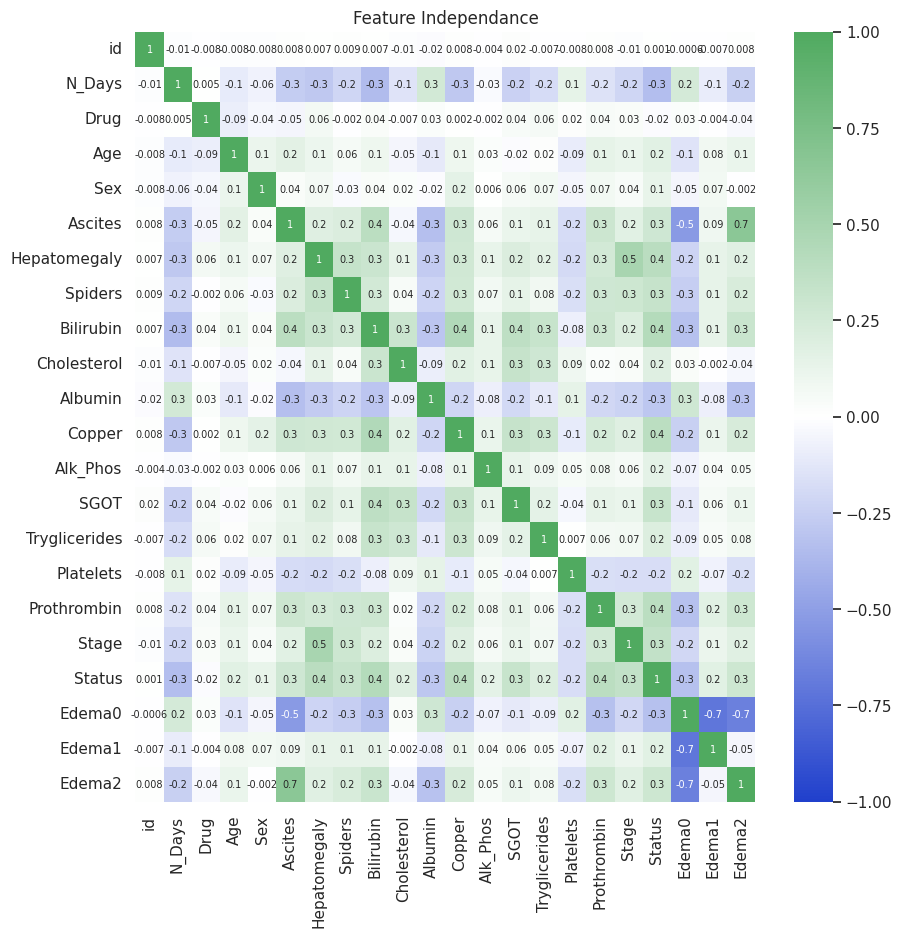

In [ ]:
plt.figure(figsize=(10, 10))
plt.title("Feature Independance")
numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']
sns.heatmap(df.select_dtypes(include=numerics).corr(), cmap=cmap1, annot=True, annot_kws={'fontsize':7}, fmt='.1g', vmin=-1, vmax=1, center= 0)
plt.show()

In [ ]:
df.select_dtypes(include=numerics).columns

In [ ]:
from scipy import stats
cols = ['N_Days', 'Age', 'Bilirubin', 'Cholesterol', 'Albumin', 'Copper',
       'Alk_Phos', 'SGOT', 'Tryglicerides', 'Platelets', 'Prothrombin',
       'Stage']
n_columns = len(cols)
fig,axes = plt.subplots(n_columns, 2,figsize=(15, 60),dpi=300)
for i, col in enumerate(cols):
    sns.kdeplot(data = df, x=col, hue='Status', label='Orig Class', fill=True, ax=axes[i][0])
    sns.boxplot(x=df[col], y=df['Status'], ax=axes[i][1])
fig.tight_layout()
plt.show()

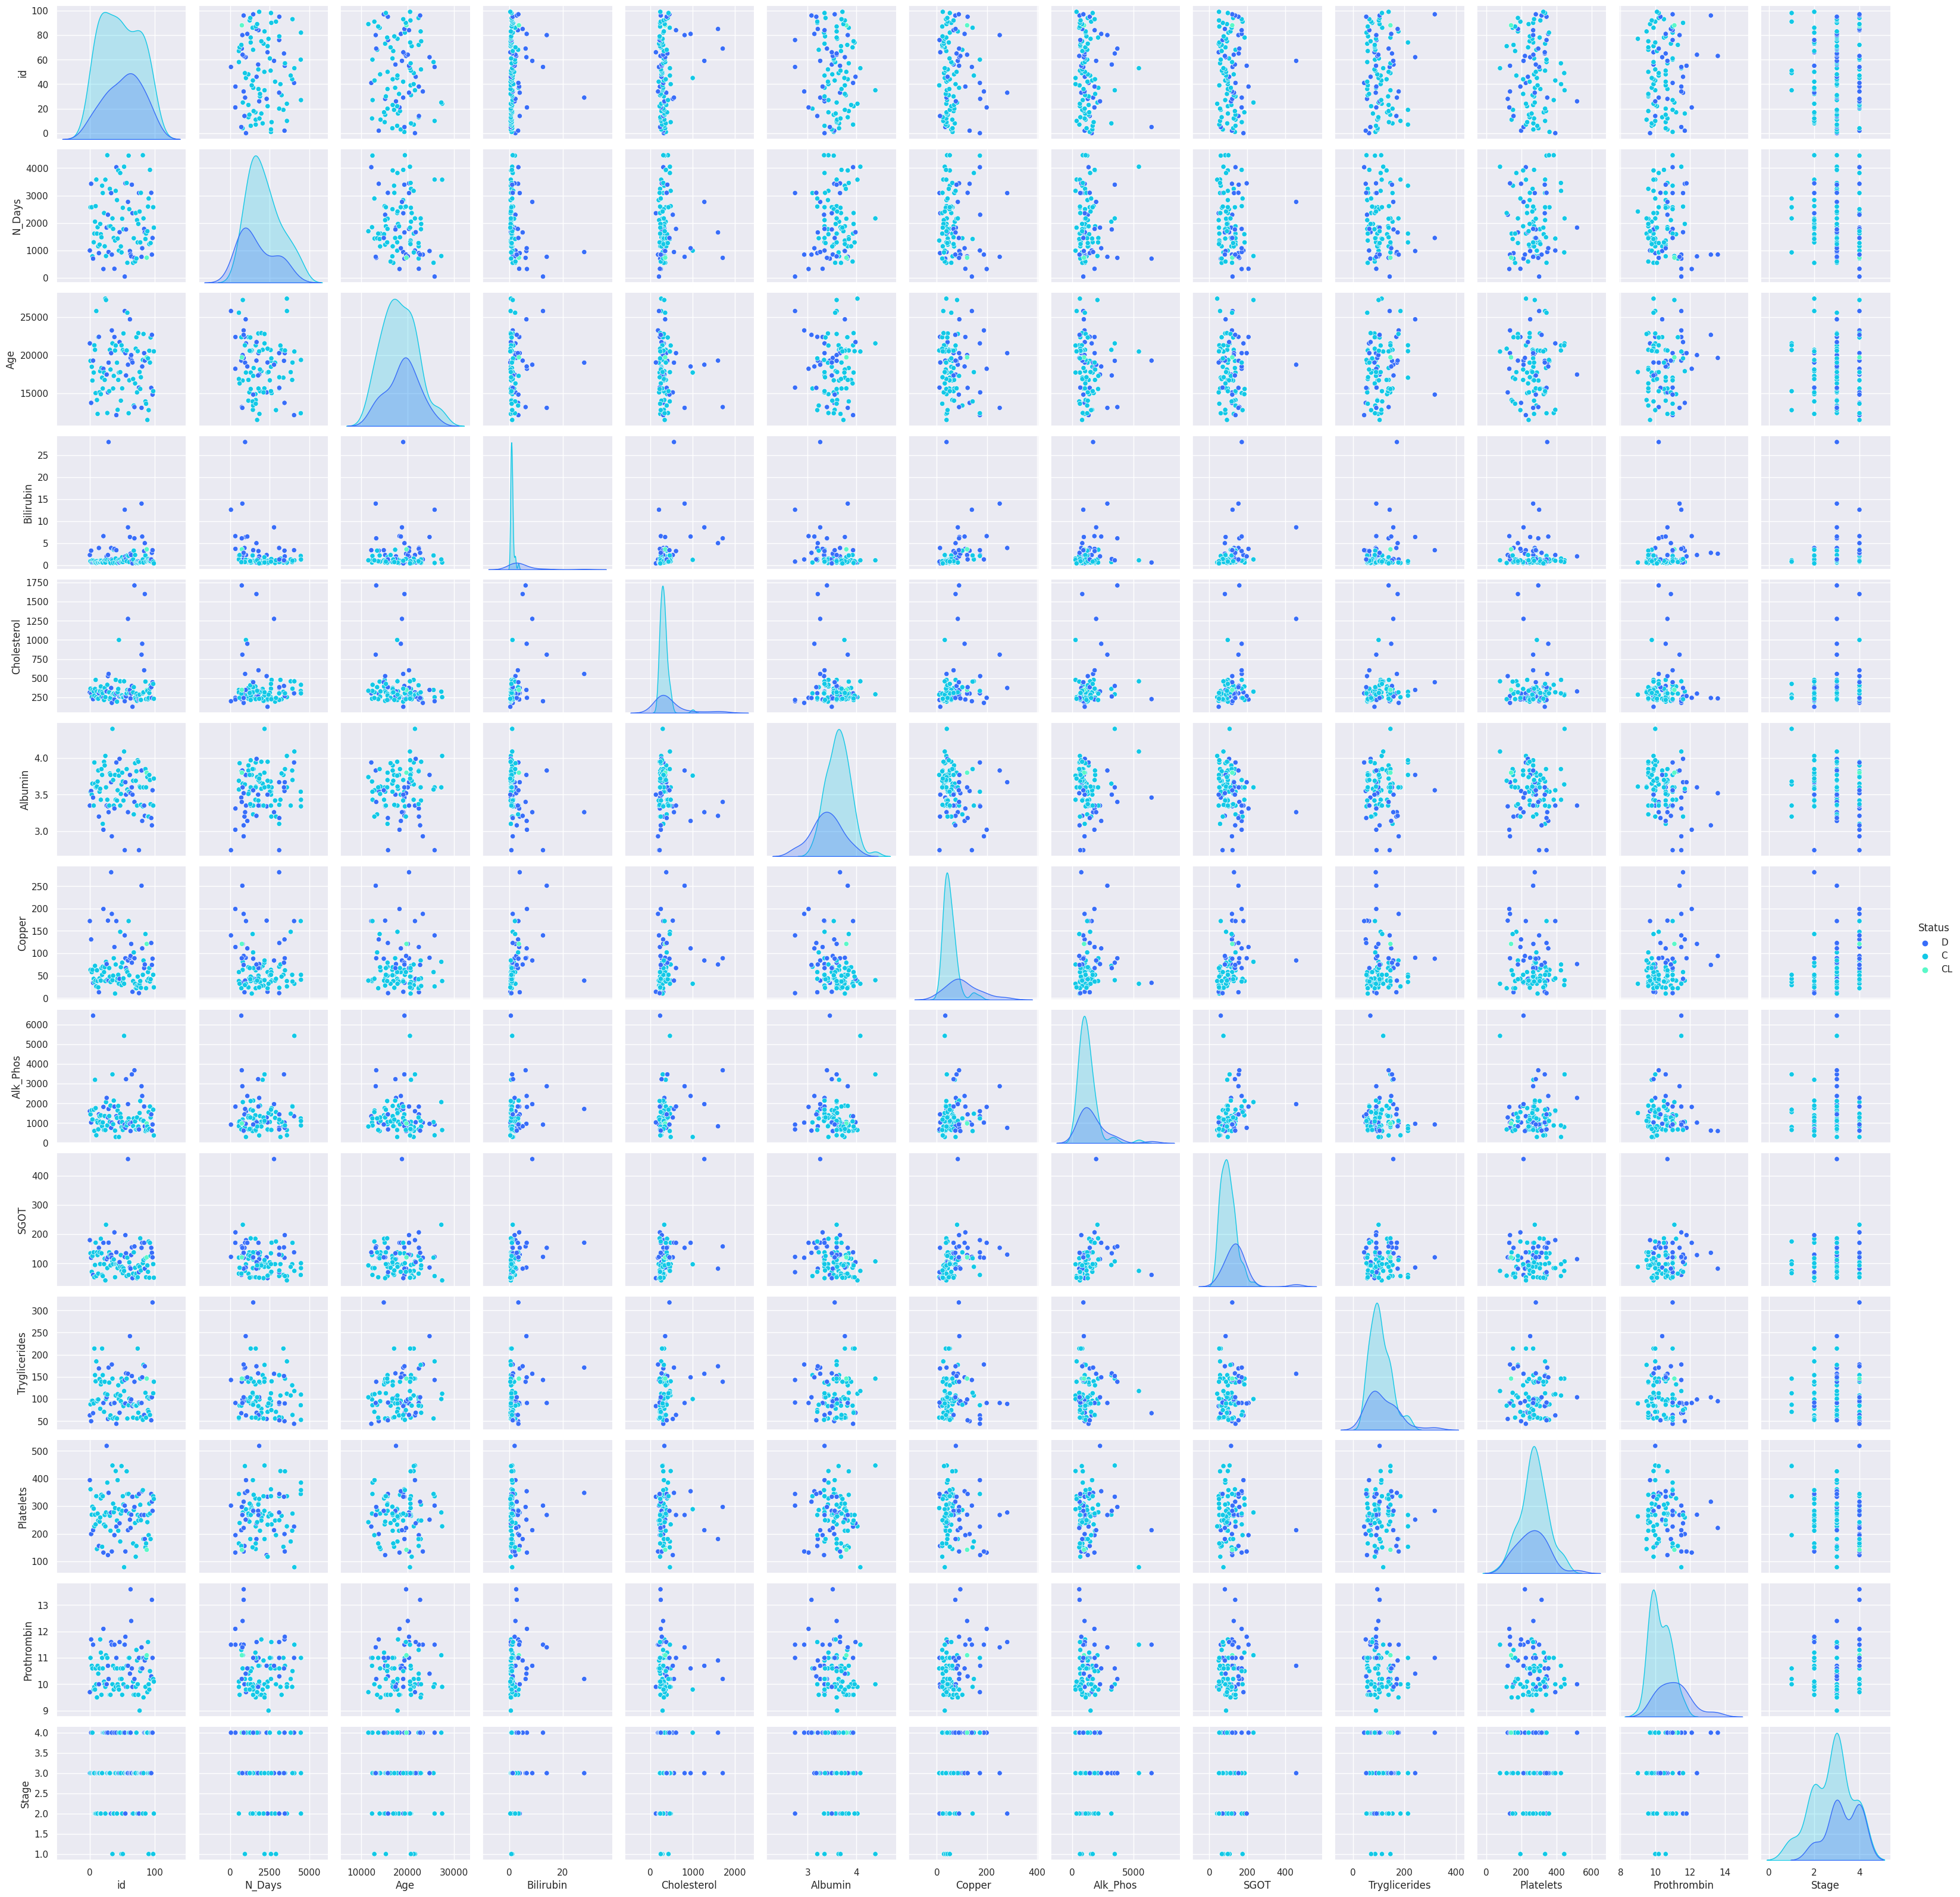

In [ ]:
sns.pairplot(df.iloc[: 100], hue='Status')

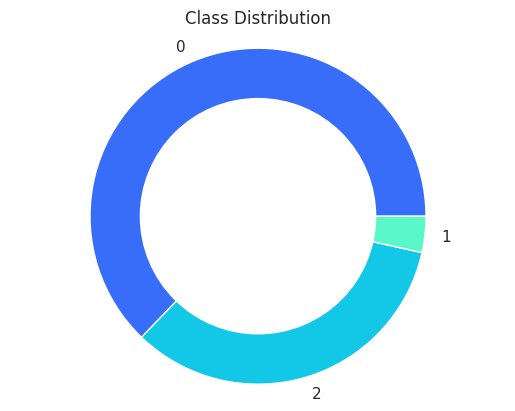

# Preprocessing

In [ ]:
ordinal_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders']
oe = OrdinalEncoder()
oe.fit(df[ordinal_cols])

OrdinalEncoder()

In [ ]:
df[ordinal_cols]=oe.transform(df[ordinal_cols])

In [ ]:
one_hot_cols = ['Edema']
ohe = OneHotEncoder()
ohe.fit(df[one_hot_cols])

OneHotEncoder()

In [ ]:
encoded_Edema = ohe.transform(df[one_hot_cols])
df = pd.concat([df.drop(one_hot_cols, axis=1),
                pd.DataFrame(encoded_Edema.toarray()).add_prefix('Edema')],
                axis=1)

In [ ]:
le = LabelEncoder()
le.fit(df['Status'])

LabelEncoder()

In [ ]:
df['Status']=le.transform(df['Status'])
le.inverse_transform([0, 1, 2])

array(['C', 'CL', 'D'], dtype=object)

In [ ]:
Y = df['Status'].values
X = df.drop(['Status'], axis=1).values

In [ ]:
ss = StandardScaler()
ss.fit(X)

StandardScaler()

In [ ]:
X = ss.transform(X)

### Preproc Pipeline

In [ ]:
def PreProc1(df, oe=oe, ohe=ohe, ss=ss):
    ordinal_cols = ['Drug', 'Sex', 'Ascites', 'Hepatomegaly', 'Spiders']
    one_hot_cols = ['Edema']

    df[ordinal_cols]=oe.transform(df[ordinal_cols])
    encoded_Edema = ohe.transform(df[one_hot_cols])
    df = pd.concat([df.drop(one_hot_cols, axis=1),
                    pd.DataFrame(encoded_Edema.toarray()).add_prefix('Edema')],
                    axis=1)
    X = df.values
    X = ss.transform(X)
    return X

In [ ]:
X_Test = PreProc1(df_test)

### SMOTE Upsampling

In [ ]:
from imblearn.over_sampling import SMOTE

sm = SMOTE(sampling_strategy = {0: 4965,
                                1: 2000,
                                2: 3000},
           random_state=69)
X, Y = sm.fit_resample(X, Y)

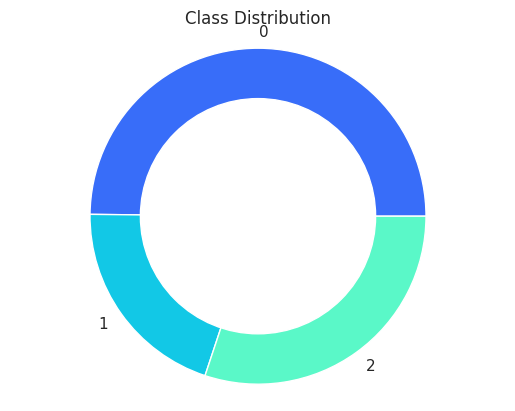

In [ ]:
labels, sizes = np.unique(Y, return_counts=True)
fig, ax = plt.subplots()
ax.pie(sizes, labels=labels)
center_circle = plt.Circle((0, 0), 0.70, fc='white')
fig.gca().add_artist(center_circle)
ax.axis('equal')
plt.title('Class Distribution')
plt.show()

### Train-Test Split & Scoring

In [ ]:
from sklearn.model_selection import train_test_split
X_train, x_test, Y_train, y_test = train_test_split(X, Y, test_size=0.1)
x_train, x_val, y_train, y_val = train_test_split(X_train, Y_train, test_size=0.1)

In [ ]:
X_Train, X_Val, Y_Train, Y_Val = train_test_split(X, Y, test_size=0.1)

In [ ]:
X_Val, x_test, Y_Val, y_test = train_test_split(X_Val, Y_Val, test_size=0.1)

In [ ]:
X_Train.shape, X_Val.shape, x_test.shape

((8968, 21), (897, 21), (100, 21))

In [ ]:
def score_metrics(y_test, prediction, labels=None):
    print('f1_score : ', f1_score(y_test, prediction, average=None))
    print('accuracy : ', accuracy_score(y_test, prediction))
    try:
        print('log_loss : ', log_loss(y_test, prediction, labels=labels))
    except:
        print('Cannot calculate log-loss')
    cm = confusion_matrix(y_test, prediction)

    class_labels = [0, 1, 2]
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=class_labels, yticklabels=class_labels)
    plt.title('Confusion Matrix')
    plt.xlabel('Predicted')
    plt.ylabel('True')
    plt.show()
    plt.show()

# Baseline Models

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import GradientBoostingClassifier

def baselineClassificationAccuracy(x_train, y_train, x_v, y_v):
    models = [LogisticRegression, SVC, DecisionTreeClassifier, RandomForestClassifier, GaussianNB, GradientBoostingClassifier]
    names = ['LogisticRegression', 'SVC', 'DecisionTreeClassifier', 'RandomForestClassifier', 'GaussianNB', 'GradientBoostingClassifier']
    j=0
    for i in models:
        model = i()
        model.fit(x_train, y_train)
        print(names[j], '\n')
        predicted_values = model.predict(x_v)
        score_metrics(y_v, predicted_values, [0, 1, 2])
        print('----------------------------------------------------------------------------------------')
        j+=1

LogisticRegression 

f1_score :  [0.79074447 0.4467354  0.68762279]
accuracy :  0.705685618729097
Cannot calculate log-loss


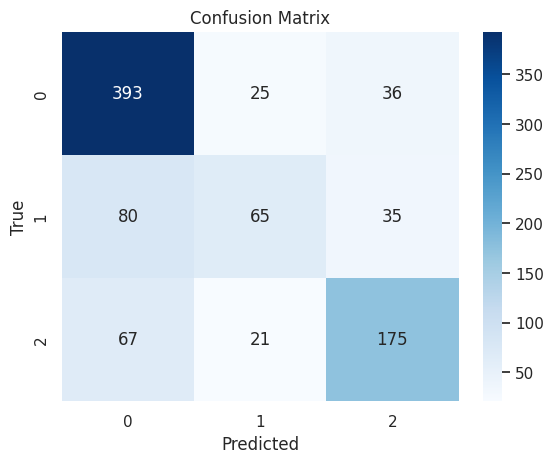

----------------------------------------------------------------------------------------
SVC 

f1_score :  [0.82658359 0.72566372 0.75203252]
accuracy :  0.7870680044593088
Cannot calculate log-loss


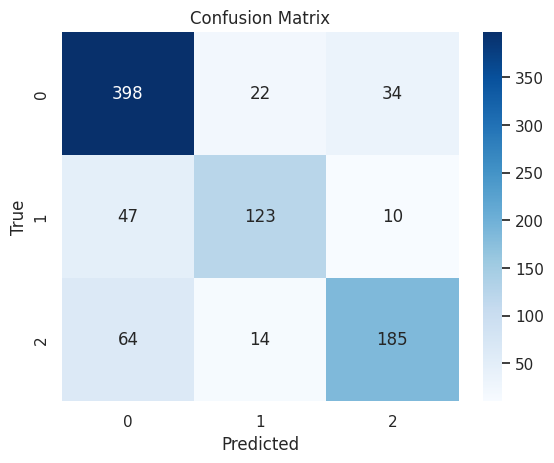

----------------------------------------------------------------------------------------
DecisionTreeClassifier 

f1_score :  [0.80623608 0.82065217 0.6969697 ]
accuracy :  0.7770345596432553
Cannot calculate log-loss


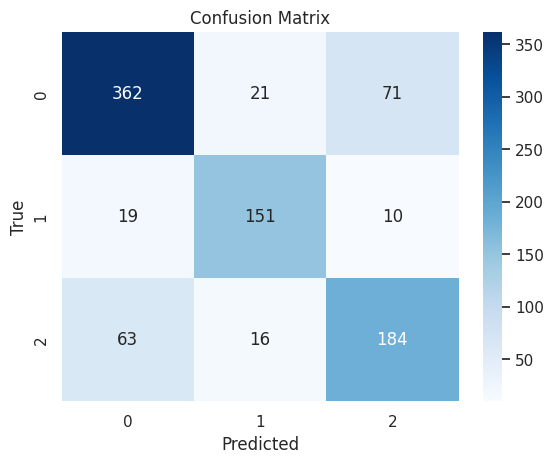

----------------------------------------------------------------------------------------
RandomForestClassifier 

f1_score :  [0.88528139 0.91525424 0.80620155]
accuracy :  0.8684503901895206
Cannot calculate log-loss


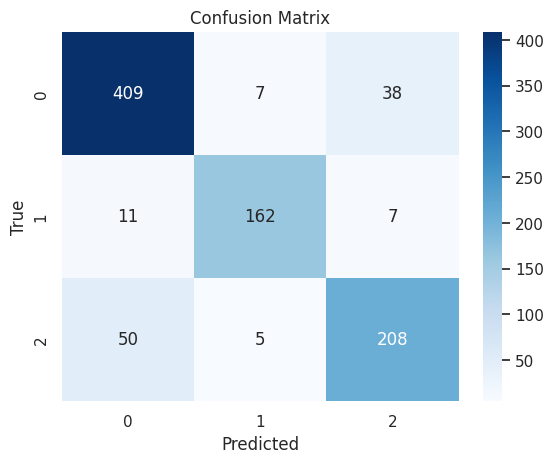

----------------------------------------------------------------------------------------
GaussianNB 

f1_score :  [0.76669716 0.34098361 0.47979798]
accuracy :  0.6309921962095875
Cannot calculate log-loss


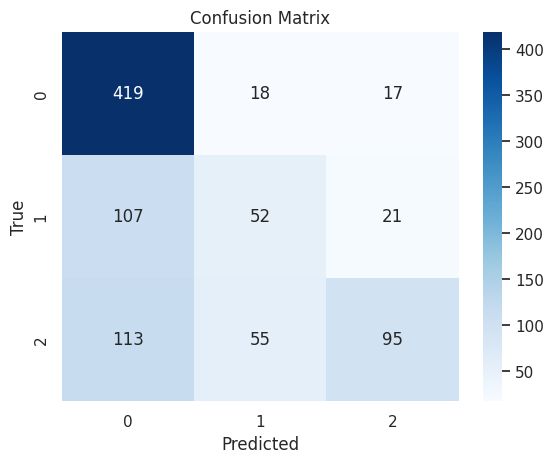

----------------------------------------------------------------------------------------
GradientBoostingClassifier 

f1_score :  [0.87141339 0.80446927 0.76767677]
accuracy :  0.8294314381270903
Cannot calculate log-loss


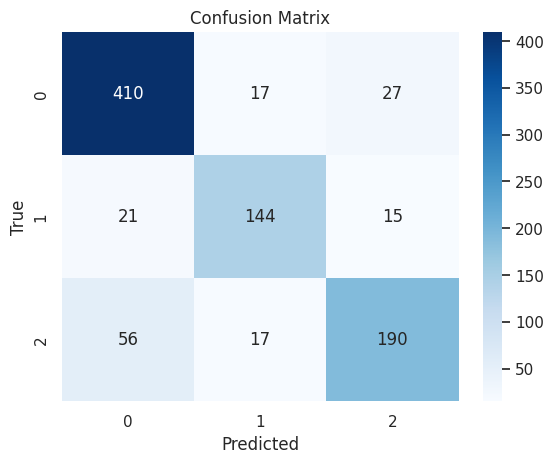

----------------------------------------------------------------------------------------


In [ ]:
baselineClassificationAccuracy(x_train, y_train, x_val, y_val)

# Gradient Boosters and Ensembles

### Random Forest Regression

In [ ]:
from sklearn.model_selection import RandomizedSearchCV
random_grid = {
    'max_depth' : [None, 5, 10, 20, 50, 80, 110, 140, 170, 200],
    'min_samples_split' : [1, 2, 5],
    'min_samples_leaf' : [1, 2, 4],
    'max_features': ['sqrt', 'log2'],
    'bootstrap' : [True, False],
}

rscv = RandomizedSearchCV(param_distributions = random_grid, estimator=RandomForestClassifier(),
                          n_iter = 50, cv = 15, random_state=69, n_jobs = -1)
rscv.fit(X_Train, Y_Train)

In [ ]:
best_rf_ = {'min_samples_split': 5,
 'min_samples_leaf': 2,
 'max_features': 'sqrt',
 'max_depth': 80,
 'bootstrap': True}
rf_optim = RandomForestClassifier(**best_rf_)
rf_optim.fit(X_Train, Y_Train)

RandomForestClassifier(max_depth=80, min_samples_leaf=2, min_samples_split=5)

In [ ]:
rf_optim.score(X_Val, Y_Val)

0.8662207357859532

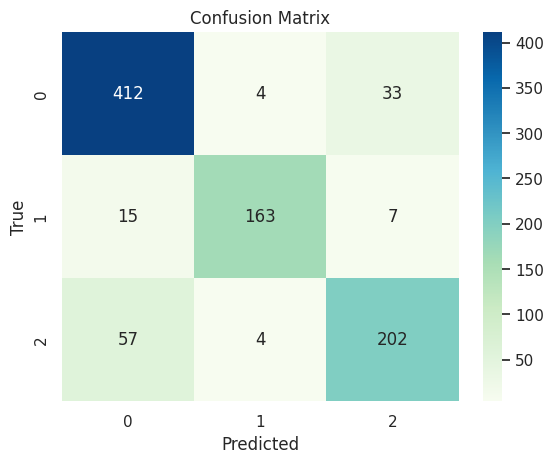

In [ ]:
predictions = rf_optim.predict(X_Val)
cm = confusion_matrix(Y_Val, predictions)

class_labels = [0, 1, 2]
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
predictions = rf_optim.predict_proba(X_Test)

### XGBoost HyperParam tuning

In [ ]:
import xgboost as xgb
from sklearn.model_selection import cross_val_score
from skopt import BayesSearchCV

In [ ]:
model = xgb.XGBClassifier()
model.fit(X_Train, Y_Train)

In [ ]:
model.score(X_Val, Y_Val)

In [ ]:
search_space = {
    'learning_rate': [0.01, 0.1, 0.2],
    'gamma': [1e-9, 0.5],
    'scale_pos_weight': [1e-6, 500],  # Adjusted bounds for log-uniform
    'n_estimators': [30, 50, 100, 300, 500, 800, 1200],
    'max_depth': (3, 7, 10),
    'min_child_weight': (1, 3),
    'subsample': (0.8, 1.0),
    'colsample_bytree': (0.8, 1.0),
}


bayes_search = BayesSearchCV(
    xgb.XGBClassifier(),
    search_space,
    n_iter=50,
    scoring='accuracy',
    n_jobs=-1,
    cv=3,
)

np.int = int
bayes_search.fit(X_Train, Y_Train)

In [ ]:
bayes_search.best_params_

In [ ]:
xgb_model = xgb.XGBClassifier(
             colsample_bytree= 0.9335775071754608,
             gamma= 0.23425986690752887,
             learning_rate=0.01,
             max_depth=7,
             min_child_weight=2,
             n_estimators=1200,
             scale_pos_weight=211,
             subsample=0.8578018040119446
)
xgb_model.fit(X_Train, Y_Train)

XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=0.9335775071754608, device=None,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0.23425986690752887,
              grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=0.01, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=7, max_leaves=None,
              min_child_weight=2, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=1200, n_jobs=None,
              num_parallel_tree=None, objective='multi:softprob', ...)

In [ ]:
xgb_model.score(X_Val, Y_Val)

0.8706800445930881

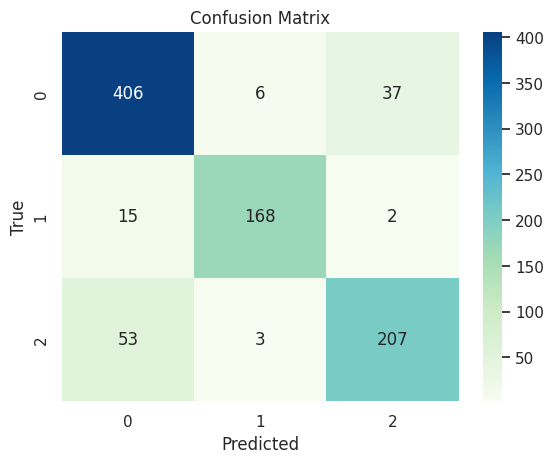

In [ ]:
predictions = xgb_model.predict(X_Val)
cm = confusion_matrix(Y_Val, predictions)

class_labels = [0, 1, 2]
sns.heatmap(cm, annot=True, fmt='d', cmap='GnBu', xticklabels=class_labels, yticklabels=class_labels)
plt.title('Confusion Matrix')
plt.xlabel('Predicted')
plt.ylabel('True')
plt.show()

In [ ]:
predictions = xgb_model.predict_proba(X_Test)

### CatBoost with OPTuna

In [ ]:
import optuna
from catboost import CatBoostClassifier

In [ ]:
def objective(trial):
    params = {
        'iterations': trial.suggest_int('iterations', 500, 2000),
        'learning_rate': trial.suggest_loguniform('learning_rate', 0.01, 0.1),
        'depth': trial.suggest_int('depth', 6, 10),
        'l2_leaf_reg': trial.suggest_loguniform('l2_leaf_reg', 1e-3, 10.0),
        'border_count': trial.suggest_int('border_count', 32, 255),
        'bagging_temperature': trial.suggest_loguniform('bagging_temperature', 1e-8, 1.0),
        'min_child_samples': trial.suggest_int('min_child_samples', 1, 20),

        'loss_function': 'Logloss',
        'eval_metric': 'Accuracy',
        'random_state': 42,
    }
    cat_model = CatBoostClassifier(**params)
    cat_model.fit(X_Train, Y_Train, eval_set=(X_Val, Y_Val), early_stopping_rounds=10)

    predictions = cat_model.predict_proba(X_Val)
    score = log_loss(Y_Val, predictions)

    return score

In [ ]:
study_catboost = optuna.create_study(direction='minimize')
study_catboost.optimize(objective, n_trials=50)

print('Best hyperparameters:', study_catboost.best_params)
print('Best Log Loss:', study_catboost.best_value)

# Tensorflow NN 64-32u

In [ ]:
!nvidia-smi

Mon Jan  1 19:01:55 2024       
+-----------------------------------------------------------------------------+
| NVIDIA-SMI 470.161.03   Driver Version: 470.161.03   CUDA Version: 11.4     |
|-------------------------------+----------------------+----------------------+
| GPU  Name        Persistence-M| Bus-Id        Disp.A | Volatile Uncorr. ECC |
| Fan  Temp  Perf  Pwr:Usage/Cap|         Memory-Usage | GPU-Util  Compute M. |
|                               |                      |               MIG M. |
|===============================+======================+======================|
|   0  Tesla T4            Off  | 00000000:00:04.0 Off |                    0 |
| N/A   38C    P8     9W /  70W |      0MiB / 15109MiB |      0%      Default |
|                               |                      |                  N/A |
+-------------------------------+----------------------+----------------------+
|   1  Tesla T4            Off  | 00000000:00:05.0 Off |                    0 |
| N/A   

In [ ]:
from tensorflow.keras.callbacks import EarlyStopping

INPUT_SHAPE = X.shape[1]
BATCH_SIZE = 32
NUM_CLASSES = 3
EPOCHS = 100

early_stop = EarlyStopping(
    monitor = "val_loss",
    patience = 10
)

In [ ]:
import tensorflow as tf

model = tf.keras.Sequential([
    tf.keras.layers.Input(shape=INPUT_SHAPE),
    tf.keras.layers.Dense(units=64, activation='relu'),
    tf.keras.layers.Dense(units=32, activation='relu'),
    tf.keras.layers.Dense(units=NUM_CLASSES, activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_6 (Dense)             (None, 64)                1408      
                                                                 
 dense_7 (Dense)             (None, 32)                2080      
                                                                 
 dense_8 (Dense)             (None, 3)                 99        
                                                                 
Total params: 3587 (14.01 KB)
Trainable params: 3587 (14.01 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_Train, Y_Train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data = (X_Val, Y_Val),
          callbacks = [early_stop],
          shuffle=True
)

Epoch 1/100
281/281 [==============================] - 3s 4ms/step - loss: 0.7670 - accuracy: 0.6679 - val_loss: 0.6964 - val_accuracy: 0.7079
Epoch 2/100
281/281 [==============================] - 1s 3ms/step - loss: 0.6667 - accuracy: 0.7207 - val_loss: 0.6425 - val_accuracy: 0.7224
Epoch 3/100
281/281 [==============================] - 1s 3ms/step - loss: 0.6252 - accuracy: 0.7438 - val_loss: 0.6084 - val_accuracy: 0.7369
Epoch 4/100
281/281 [==============================] - 1s 3ms/step - loss: 0.5882 - accuracy: 0.7609 - val_loss: 0.5806 - val_accuracy: 0.7492
Epoch 5/100
281/281 [==============================] - 1s 3ms/step - loss: 0.5615 - accuracy: 0.7732 - val_loss: 0.5643 - val_accuracy: 0.7603
Epoch 6/100
281/281 [==============================] - 1s 3ms/step - loss: 0.5356 - accuracy: 0.7870 - val_loss: 0.5465 - val_accuracy: 0.7670
Epoch 7/100
281/281 [==============================] - 1s 3ms/step - loss: 0.5150 - accuracy: 0.7963 - val_loss: 0.5354 - val_accuracy: 0.7781

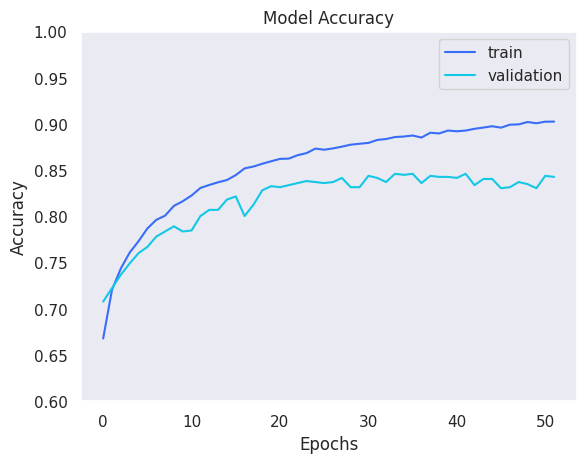

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0.6,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.show()

In [ ]:
model.evaluate(X_Val, Y_Val)

29/29 [==============================] - 0s 2ms/step - loss: 0.4317 - accuracy: 0.8428


[0.4317328929901123, 0.8428093791007996]

In [ ]:
model.predict(np.expand_dims(x_train[80], axis=0))

1/1 [==============================] - 0s 55ms/step


array([[7.5033551e-01, 3.1712895e-07, 2.4966410e-01]], dtype=float32)

In [ ]:
np.argmax(model.predict(np.expand_dims(x_train[80], axis=0)))

1/1 [==============================] - 0s 21ms/step


0

4/4 [==============================] - 0s 2ms/step
f1_score :  [0.88288288 0.94736842 0.74509804]
accuracy :  0.86
Cannot calculate log-loss


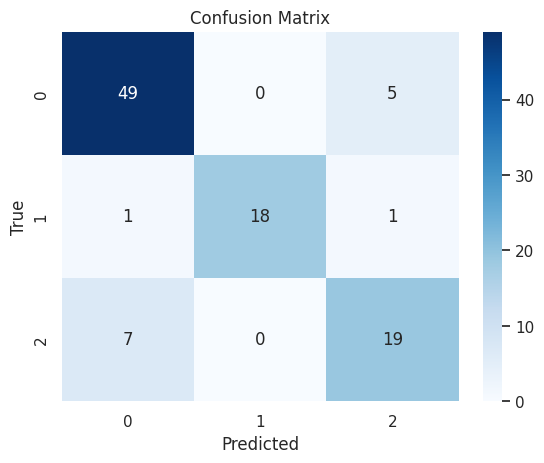

In [ ]:
score_metrics(np.argmax(model.predict(x_test), axis=-1), y_test)

# Tensorflow TF NN 128

In [ ]:
INPUT_SHAPE = X.shape[1]
BATCH_SIZE = 64
NUM_CLASSES = 3
EPOCHS = 100

early_stop = EarlyStopping(
    monitor = "val_loss",
    patience = 10
)

In [ ]:
import tensorflow as tf

def multi_classificn_model(input_shape, num_classes):
    model_inputs = tf.keras.layers.Input(shape=input_shape)
    x = tf.keras.layers.Dense(units=128, activation = 'relu')(model_inputs)
    x = tf.keras.layers.Dense(units=64, activation='relu')(x)
    x = tf.keras.layers.Dense(units=32, activation = 'relu')(x)
    x = tf.keras.layers.Dense(units=8, activation = 'relu')(x)
    predictions = tf.keras.layers.Dense(units=num_classes, activation = 'softmax')(x)

    return tf.keras.Model(inputs=model_inputs, outputs=predictions)

model = multi_classificn_model(INPUT_SHAPE, NUM_CLASSES)
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_4 (InputLayer)        [(None, 21)]              0         
                                                                 
 dense_9 (Dense)             (None, 128)               2816      
                                                                 
 dense_10 (Dense)            (None, 64)                8256      
                                                                 
 dense_11 (Dense)            (None, 32)                2080      
                                                                 
 dense_12 (Dense)            (None, 8)                 264       
                                                                 
 dense_13 (Dense)            (None, 3)                 27        
                                                                 
Total params: 13443 (52.51 KB)
Trainable params: 13443 (52.51

In [ ]:
model.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
history = model.fit(X_Train, Y_Train,
          epochs=EPOCHS,
          batch_size=BATCH_SIZE,
          validation_data = (X_Val, Y_Val),
          callbacks = [early_stop],
          shuffle=True
)

Epoch 1/100
141/141 [==============================] - 3s 5ms/step - loss: 0.8048 - accuracy: 0.6596 - val_loss: 0.6884 - val_accuracy: 0.6912
Epoch 2/100
141/141 [==============================] - 1s 4ms/step - loss: 0.6611 - accuracy: 0.7242 - val_loss: 0.6343 - val_accuracy: 0.7302
Epoch 3/100
141/141 [==============================] - 1s 4ms/step - loss: 0.6021 - accuracy: 0.7525 - val_loss: 0.5953 - val_accuracy: 0.7547
Epoch 4/100
141/141 [==============================] - 1s 4ms/step - loss: 0.5537 - accuracy: 0.7705 - val_loss: 0.5476 - val_accuracy: 0.7670
Epoch 5/100
141/141 [==============================] - 1s 4ms/step - loss: 0.5026 - accuracy: 0.7985 - val_loss: 0.5293 - val_accuracy: 0.7793
Epoch 6/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4600 - accuracy: 0.8177 - val_loss: 0.4987 - val_accuracy: 0.8027
Epoch 7/100
141/141 [==============================] - 1s 4ms/step - loss: 0.4325 - accuracy: 0.8262 - val_loss: 0.4682 - val_accuracy: 0.8149

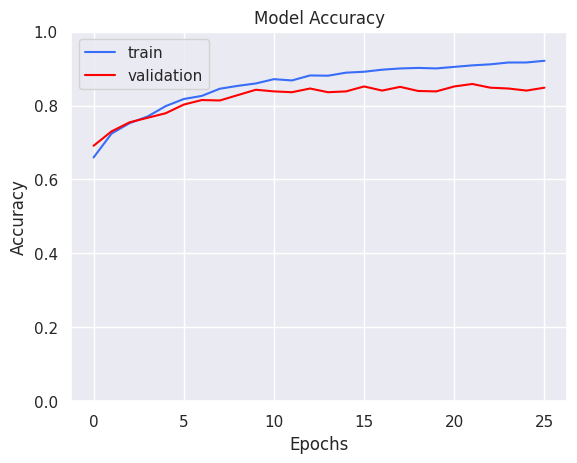

In [ ]:
fig1 = plt.gcf()
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'], color='red')
# plt.plot(history.history['val_accuracy'])
plt.axis(ymin=0,ymax=1)
plt.grid()
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epochs')
plt.legend(['train', 'validation'])
plt.grid(True)
plt.show()

In [ ]:
model.evaluate(X_Val, Y_Val)

29/29 [==============================] - 0s 2ms/step - loss: 0.4169 - accuracy: 0.8484


[0.416869193315506, 0.8483834862709045]

4/4 [==============================] - 0s 2ms/step
f1_score :  [0.87931034 0.94736842 0.69565217]
accuracy :  0.85
Cannot calculate log-loss


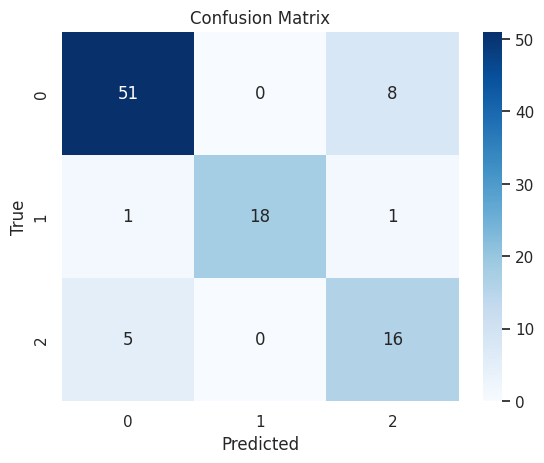

In [ ]:
score_metrics(np.argmax(model.predict(x_test), axis=-1), y_test)

In [ ]:
predictions = model.predict(X_Test)

165/165 [==============================] - 0s 1ms/step


# Torch 128-64-32

In [ ]:
BATCH_SIZE = 64
EPOCHS = 40

In [ ]:
import torch
import torch.nn as nn
import torch.optim as optim

class MultiClassClassifier(nn.Module):
    def __init__(self, input_size, hidden_size, num_classes):
        super(MultiClassClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_size)
        self.fc2 = nn.Linear(hidden_size, hidden_size//2)
        self.fc3 = nn.Linear(hidden_size//2, hidden_size//4)
        self.fc4 = nn.Linear(hidden_size//4, num_classes)
        self.relu = nn.ReLU()

    def forward(self, x):
        x = self.relu(self.fc1(x))
        x = self.relu(self.fc2(x))
        x = self.relu(self.fc3(x))
        x = self.fc4(x)
        return x

input_size = X.shape[1]
hidden_size = 128
num_classes = 3

In [ ]:
X_train_tensor = torch.tensor(x_train, dtype=torch.float32)
Y_train_tensor = torch.tensor(y_train, dtype=torch.long)

train_dataset = torch.utils.data.TensorDataset(X_train_tensor, Y_train_tensor)
train_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=True)

In [ ]:
X_val_tensor = torch.tensor(x_val, dtype=torch.float32)
Y_val_tensor = torch.tensor(y_val, dtype=torch.long)

val_dataset = torch.utils.data.TensorDataset(X_val_tensor, Y_val_tensor)
val_loader = torch.utils.data.DataLoader(train_dataset, batch_size=BATCH_SIZE, shuffle=False)

In [ ]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

In [ ]:
model = MultiClassClassifier(input_size, hidden_size, num_classes)
criterion = nn.CrossEntropyLoss()
optimizer = optim.Adam(model.parameters(), lr=0.001)

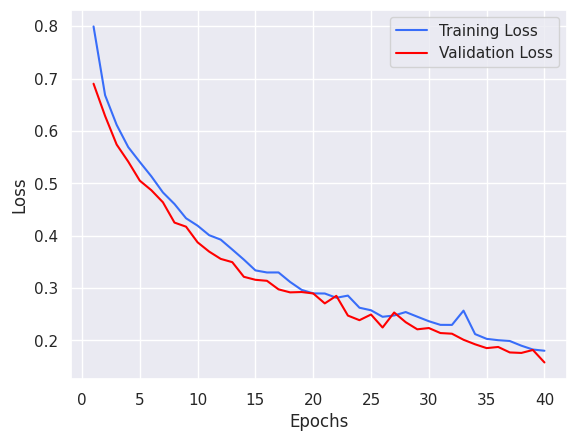

In [ ]:
history = []
val_history = []

for epoch in range(EPOCHS):
    model.train()
    running_loss = 0.0

    for inputs, labels in train_loader:
        optimizer.zero_grad()

        outputs = model(inputs)
        loss = criterion(outputs, labels)
        loss.backward()
        optimizer.step()

        running_loss += loss.item()

    epoch_loss = running_loss / len(train_loader)
    history.append(epoch_loss)

    model.eval()
    val_running_loss = 0.0
    with torch.no_grad():
        for val_inputs, val_labels in val_loader:
            val_outputs = model(val_inputs)
            val_loss = criterion(val_outputs, val_labels)
            val_running_loss += val_loss.item()

    val_epoch_loss = val_running_loss / len(val_loader)
    val_history.append(val_epoch_loss)

plt.plot(np.arange(1, EPOCHS + 1), history, label='Training Loss')
plt.plot(np.arange(1, EPOCHS + 1), val_history, label='Validation Loss', color='red')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
model.eval()
with torch.no_grad():
    raw_predictions = model(torch.tensor(X_Val, dtype=torch.float32))
    probabilities = nn.functional.softmax(raw_predictions, dim=1)

f1_score :  [0.924972   0.98143236 0.87022901]
accuracy :  0.9208472686733556
Cannot calculate log-loss


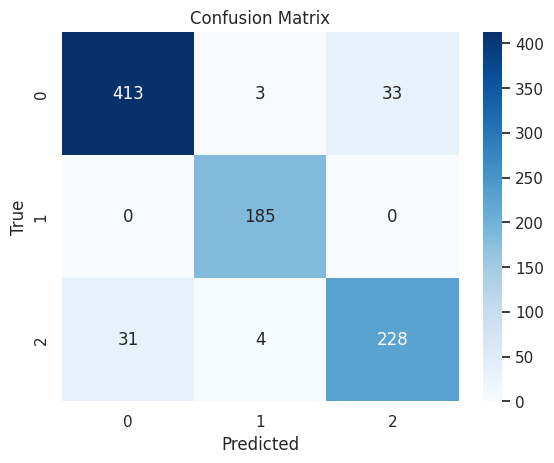

In [ ]:
score_metrics(Y_Val, np.argmax(probabilities, axis=-1))

f1_score :  [0.92982456 1.         0.84      ]
accuracy :  0.92
Cannot calculate log-loss


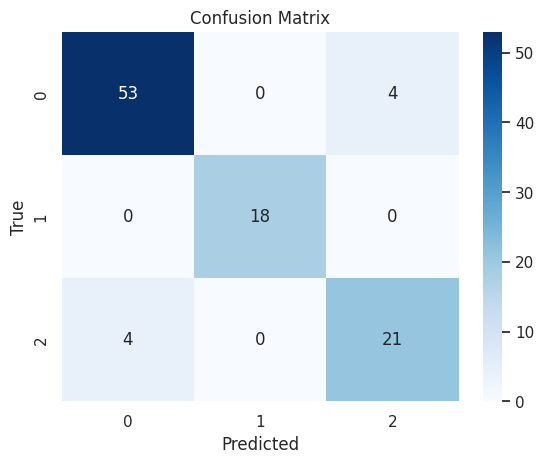

In [ ]:
with torch.no_grad():
    raw_predictions = model(torch.tensor(x_test, dtype=torch.float32))
    probabilities = nn.functional.softmax(raw_predictions, dim=1)

score_metrics(y_test, np.argmax(probabilities, axis=-1))

In [ ]:
X_test_tensor = torch.tensor(X_Test, dtype=torch.float32)

In [ ]:
model.eval()
with torch.no_grad():
    raw_predictions = model(X_test_tensor)
    probabilities = nn.functional.softmax(raw_predictions, dim=1)

In [ ]:
predictions = np.array(probabilities)

In [ ]:
predictions

array([[5.9929973e-01, 1.1855980e-09, 4.0070030e-01],
       [6.2461025e-01, 6.6583194e-02, 3.0880663e-01],
       [1.5288953e-07, 3.5449251e-32, 9.9999988e-01],
       ...,
       [8.8053912e-01, 1.2459157e-15, 1.1946095e-01],
       [9.9993360e-01, 3.5713099e-15, 6.6360808e-05],
       [3.3131260e-01, 1.5064346e-28, 6.6868734e-01]], dtype=float32)

# FINAL PREDICTION

### Fixed Voting

In [ ]:
predictions_torchNN = predictions

In [ ]:
predictions_RF = predictions

In [ ]:
predictions_XGB = predictions

In [ ]:
vote1 = predictions_torchNN+predictions_RF+predictions_XGB
vote1 /= 3.0

In [ ]:
predictions = vote1

### Export CSV

In [ ]:
df_sub = df_sample.copy()
df_sub[['Status_C', 'Status_CL', 'Status_D']]=predictions
df_sub.to_csv('submission.csv', index=False)

In [ ]:
df_sub

In [ ]:
df_sample

# RESULTS

In [ ]:
def plot_model():
    fig1 = plt.gcf()
    plt.plot(history.history['sparse_categorical_crossentropy'])
    plt.plot(history.history['val_sparse_categorical_crossentropy'], color='red')
    # plt.plot(history.history['val_accuracy'])
    plt.axis(ymin=0,ymax=1)
    plt.grid()
    plt.title('Model Accuracy')
    plt.ylabel('Accuracy')
    plt.xlabel('Epochs')
    plt.legend(['train', 'validation'])
    plt.grid(True)
    plt.show()

In [ ]:
def plot_torch():
    plt.plot(np.arange(1, EPOCHS + 1), history, label='Training Loss')
    plt.plot(np.arange(1, EPOCHS + 1), val_history, label='Validation Loss', color='red')
    plt.xlabel('Epochs')
    plt.ylabel('Loss')
    plt.legend()
    plt.show()